<a href="https://colab.research.google.com/github/intertech-academy/image_processing_py/blob/main/CPO7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformacja Fouriera sygnałów cyfrowych

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal

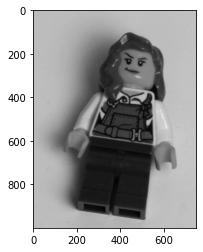

In [ ]:
im = np.array(Image.open('lego_steady.JPG'))/255
im = np.mean(im, axis = 2)

plt.imshow(im, cmap='gray')

## Konwolucja (rozmycie)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Obraz oryginalny')

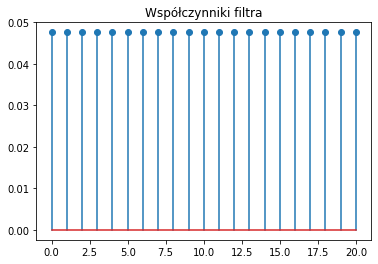

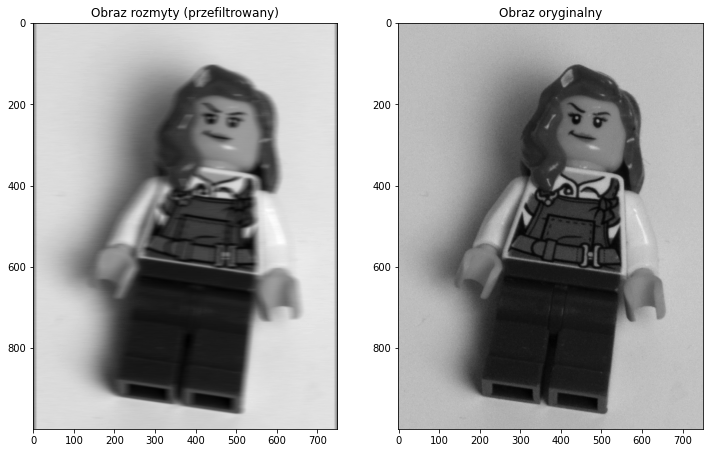

In [ ]:
no_bins = 21
h = np.ones((1, no_bins))
h = h / np.sum(h)

im_f = scipy.signal.convolve2d(im, h, mode='same')

plt.figure()
plt.stem(h[0, :])
plt.title('Współczynniki filtra')

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(im_f, cmap='gray')
plt.title('Obraz rozmyty (przefiltrowany)')

plt.subplot(1,2,2)
plt.imshow(im, cmap='gray')
plt.title('Obraz oryginalny')

## Dekonwolucja

(500.0, 600.0)

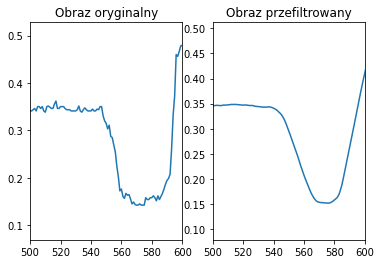

In [ ]:
x = im[300, :]
y = im_f[300, :]

plt.subplot(1, 2, 1)
plt.plot(x)
plt.title('Obraz oryginalny')
plt.xlim(500, 600)

plt.subplot(1, 2, 2)
plt.plot(y)
plt.title('Obraz przefiltrowany')
plt.xlim(500, 600)

rows=1000
cols=750
det(H)=0.0


Text(0.5, 1.0, 'Obraz przefiltrowany')

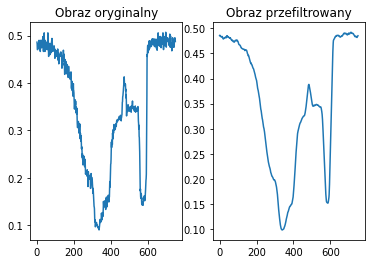

In [ ]:
rows, cols = im.shape
print(f'rows={rows}')
print(f'cols={cols}')

h_ = np.zeros((1, cols))
h_[0, 0:no_bins] = h[0, :]

H = scipy.linalg.circulant(h_)
print(f'det(H)={np.linalg.det(H)}')


y_ = np.matmul(H, x)

plt.subplot(1, 2, 1)
plt.plot(x)
plt.title('Obraz oryginalny')

plt.subplot(1, 2, 2)
plt.plot(y_)
plt.title('Obraz przefiltrowany')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(500.0, 600.0)

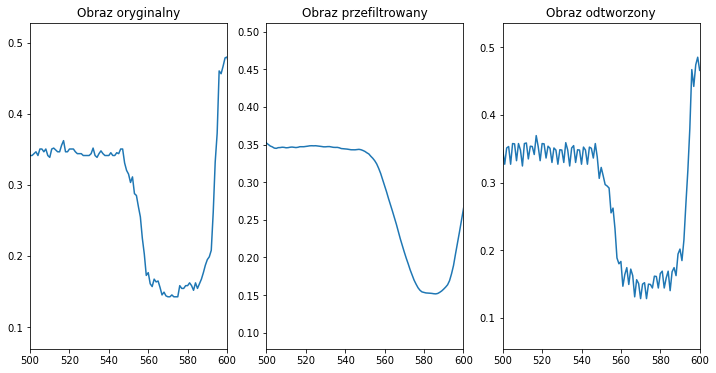

In [ ]:
x_ = np.linalg.lstsq(H, y_)[0]

plt.figure(figsize = (12, 6))
plt.subplot(1, 3, 1)
plt.plot(x)
plt.title('Obraz oryginalny')
plt.xlim(500, 600)

plt.subplot(1, 3, 2)
plt.plot(y_)
plt.title('Obraz przefiltrowany')
plt.xlim(500, 600)

plt.subplot(1, 3, 3)
plt.plot(x_)
plt.title('Obraz odtworzony')
plt.xlim(500, 600)

## Sygnały harmoniczne

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


Text(0.5, 1.0, 'Sygnał odfiltrowany')

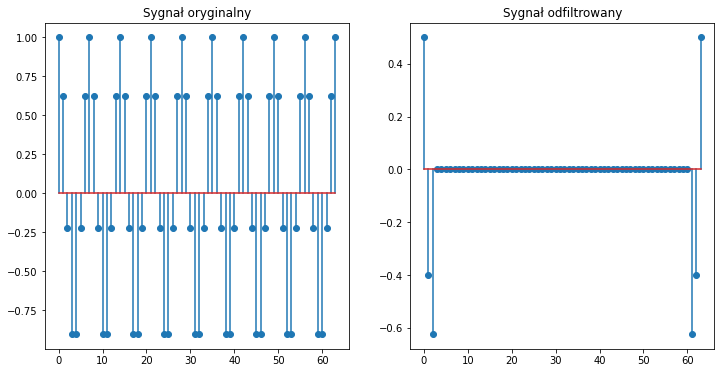

In [ ]:
no_samples = 64
n = np.linspace(0, no_samples-1, no_samples)

W_1 = 2*np.pi/7
x_1 = np.cos(W_1*n)

h = np.array([1, 1, 1, 1, 1, 1, 1])
y_1 = scipy.signal.convolve(x_1, h, mode='same')

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.stem(x_1)
plt.title('Sygnał oryginalny')

plt.subplot(1, 2, 2)
plt.stem(y_1)
plt.title('Sygnał odfiltrowany')

In [ ]:
no_bins = h.shape[0]
k = np.linspace(0, no_bins-1, no_bins)

X = np.sum(h * np.cos(W_1 * k))
Y = np.sum(h * np.sin(W_1 * k))

A = np.sqrt(X**2 + Y**2)
print(f'A = {A}')

A = 1.5700924586837752e-16
